In [1]:

import pandas as pd
from sklearn import svm
from sklearn.decomposition import PCA
from skimage.io import imshow, show
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy import ndimage

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from PreProcessing.Processing import Processing
from FeaturesExtraction.Features import Features
import numpy as np
import matplotlib.pyplot as plt


# Processing The Data

9105
Number of images loaded: 9105


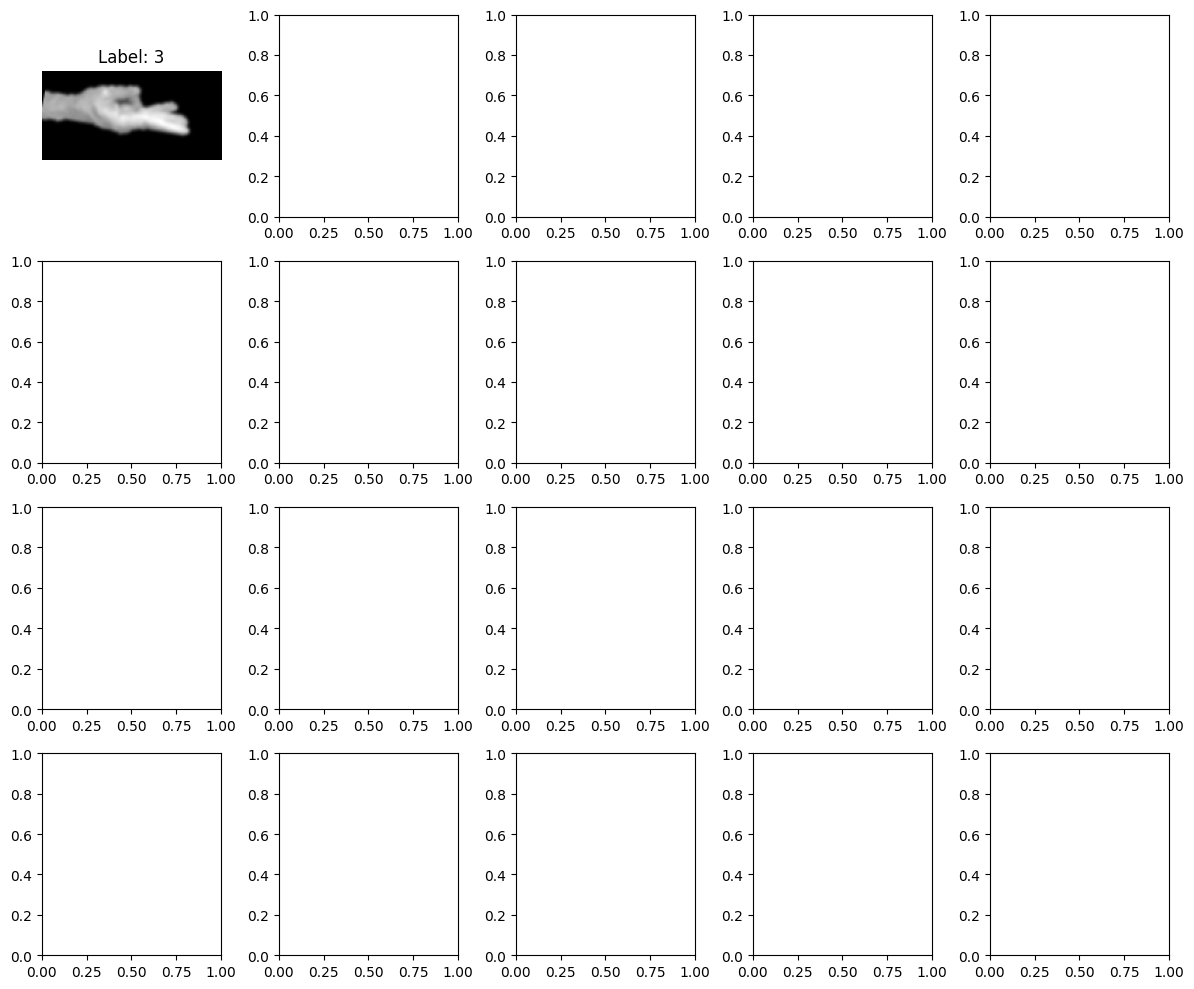

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:

Processing_obj = Processing('dataset2')
data_train = []
labels = []

# Define a list of angles for data augmentation
rotation_angles = [10, -10, 20, -20]

data_train, labels = Processing_obj.ReadAndProcess(rotation_angles)

print(f'Number of images loaded: {len(data_train)}')

# Get 20 random indices from data_train
random_indices = np.random.choice(len(data_train), size=20, replace=False)

# Plot the 20 random grayscale images
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 10))

Processing_obj.ShowSomeImages(axes, data_train, labels, random_indices)


# Features Extraction

In [4]:
Features_obj=Features()

hog_features = [Features_obj.extract_hog_features(image) for image in data_train]
print(f'HOG feature vector size: {hog_features[0].shape}')

lbp_features = [Features_obj.extract_lbp_features(image) for image in data_train]

# Flatten LBP features
flattened_lbp_features = [lbp_feature.flatten() for lbp_feature in lbp_features]
print(f'Length of flattened LBP features: {len(flattened_lbp_features)}')

# Concatenate HOG, LBP, and Gabor features
combined_features = np.hstack((hog_features, flattened_lbp_features))

print(f'Combined HOG, LBP features shape: {combined_features.shape}')


HOG feature vector size: (3780,)
Length of flattened LBP features: 9105
Combined HOG, LBP features shape: (9105, 3806)


In [5]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.65)
reduced_features = pca.fit_transform(combined_features)
print(f'Reduced features shape: {reduced_features.shape}')


Reduced features shape: (9105, 150)


In [6]:
classifiers = [
    KNeighborsClassifier(n_neighbors=7),
    # DecisionTreeClassifier(),
    # RandomForestClassifier(),
    # AdaBoostClassifier(),
    # GradientBoostingClassifier(),
    # LogisticRegression(),
    MLPClassifier(),
    SVC(kernel='linear', C=1)
]

# Initialize a dictionary to store the classifier names and their accuracies
classifier_accuracies = {clf.__class__.__name__: [] for clf in classifiers}

# Define the number of iterations
num_iterations = 15

for i in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(reduced_features, labels, test_size=0.1)

    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    for clf in classifiers:
        clf_name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        accuracy = clf.score(X_test, y_test)
        classifier_accuracies[clf_name].append(accuracy)

# Print all accuracies for each classifier and the average accuracy
for clf_name, accuracies in classifier_accuracies.items():
    print(f'{clf_name} accuracies: {accuracies}')
    avg_accuracy = np.mean(accuracies)
    print(f'{clf_name} average accuracy: {avg_accuracy}\n')

# Print the classifier with the best average accuracy
best_clf_name = max(classifier_accuracies, key=lambda x: np.mean(classifier_accuracies[x]))
print(f'Best classifier: {best_clf_name} with average accuracy {np.mean(classifier_accuracies[best_clf_name])}')

KNeighborsClassifier accuracies: [0.7870472008781558, 0.7870472008781558, 0.7925356750823271, 0.7727771679473107, 0.7925356750823271, 0.7683863885839737, 0.7903402854006586, 0.7892425905598244, 0.7925356750823271, 0.7618002195389681, 0.7771679473106476, 0.8046103183315039, 0.8111964873765093, 0.7804610318331504, 0.7760702524698134]
KNeighborsClassifier average accuracy: 0.7855836077570435

MLPClassifier accuracies: [0.7782656421514819, 0.7925356750823271, 0.7650933040614709, 0.7793633369923162, 0.7991218441273326, 0.7596048298572997, 0.7947310647639956, 0.7837541163556532, 0.8122941822173436, 0.7716794731064764, 0.7541163556531284, 0.7914379802414928, 0.7859495060373216, 0.7541163556531284, 0.7771679473106476]
MLPClassifier average accuracy: 0.7799487742407611

SVC accuracies: [0.6509330406147091, 0.6553238199780461, 0.6926454445664105, 0.6882546652030735, 0.6981339187705817, 0.6531284302963776, 0.681668496158068, 0.6827661909989023, 0.6937431394072447, 0.6673984632272228, 0.6630076838